<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-07-10 21:53:03.340782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-10 21:53:03.340803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 28s 2us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

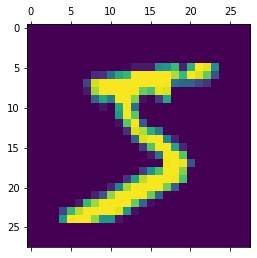

In [11]:
plt.matshow(X_train[0])

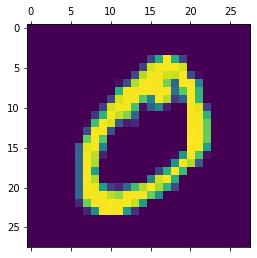

In [12]:
plt.matshow(X_train[1])

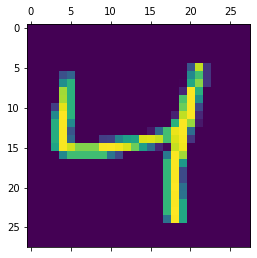

In [13]:
plt.matshow(X_train[2])

In [15]:
y_train[0]

5

In [16]:
y_train[2]

4

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [46]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
len(X_train)

60000

In [24]:
X_train.reshape(len(X_train), 28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
X_train.reshape(len(X_train), 28*28).shape

(60000, 784)

In [25]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [28]:
X_train_flattened.shape

(60000, 784)

In [30]:
X_test_flattened.shape

(10000, 784)

In [32]:
X_train_flattened[0].shape

(784,)

In [29]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# 10 in output layers neurons here 0 to 9
# Dense means all the neuran at input layer is 
# connected to every neuron in output/second layer.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# In TensorFlow and Keras you have to compile all the time,
# where we compile neural network and we pass bunch of arguments.

# Optimizer allow you to train model efficiently,
# when the backword propogation and training is going on 
# optimizer will allow you to reach Global optima in efficient way.

# loss: categorical_crossentropy-->our output loss is categorial, as we have category 0 t0 9.
# 10 classes in our output.
# sparce --> means our output variable

model.fit(X_train_flattened, y_train, epochs=5)

2022-07-10 22:10:35.508826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-10 22:10:35.508917: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-10 22:10:35.508980: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IBS-LAP-278): /proc/driver/nvidia/version does not exist
2022-07-10 22:10:35.520610: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-10 22:10:36.488210: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceed

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.9861 - accuracy: 0.8388
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1143 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7073 - accuracy: 0.8837
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5300 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4879 - accuracy: 0.8867


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9264


[0.26610055565834045, 0.9264000058174133]

In [11]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.0190289e-02, 2.7452936e-07, 6.2187701e-02, 9.5235300e-01,
       1.7273128e-03, 1.3615221e-01, 1.5029825e-06, 9.9975669e-01,
       8.4065676e-02, 7.0261663e-01], dtype=float32)

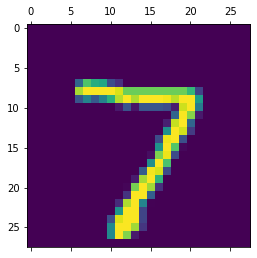

In [12]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [13]:
np.argmax(y_predicted[0])

7

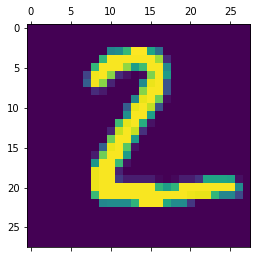

In [63]:
plt.matshow(X_test[1])

In [64]:
np.argmax(y_predicted[1])

2

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [69]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    8,  935,   15,    7,    2,   12,   10,   31,    5],
       [   4,    0,   20,  921,    0,   25,    2,   11,   15,   12],
       [   1,    1,    5,    2,  902,    0,   11,    5,   10,   45],
       [   9,    2,    6,   27,    8,  786,   14,    5,   29,    6],
       [  12,    3,    8,    1,    7,   12,  911,    2,    2,    0],
       [   1,    6,   23,    4,    6,    0,    0,  948,    1,   39],
       [   7,    7,    8,   21,    9,   31,    9,   12,  855,   15],
       [  11,    7,    1,   11,   15,    8,    0,   20,    3,  933]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

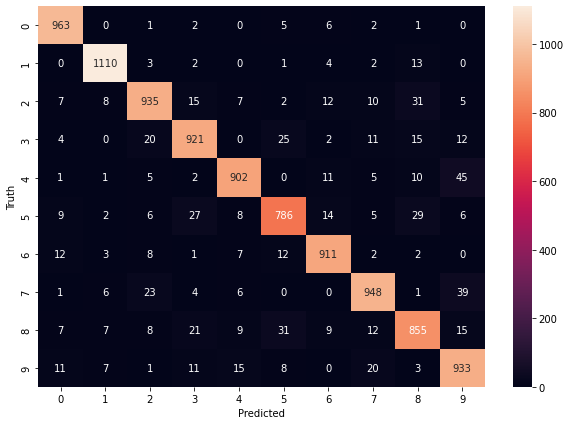

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2022-03-20 21:07:53.518262: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2691 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1213 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0854 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9843


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9720


[0.09192530810832977, 0.972000002861023]

Text(69.0, 0.5, 'Truth')

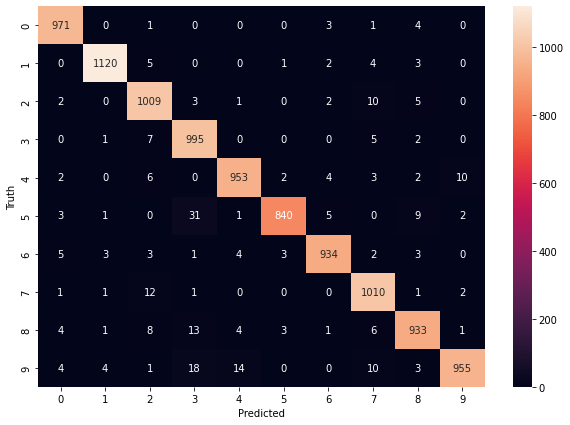

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2022-03-20 21:08:39.390383: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2754 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1261 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0892 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - accurac

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9756


[0.09283243864774704, 0.975600004196167]